# import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# load data into pandas

In [2]:
df_snp = pd.read_csv('/Users/cmdb/qbb2020-answers/day2-homework/matrix_1kg.txt', sep = '\t')
df_snp

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Question 2: Alternate Allele Frequency for SNP

In [3]:
#calculate alternate allele frequency and save to series
allele_freq = df_snp.iloc[:, 4:].sum( axis=1 ) / ( df_snp.iloc[:, 4: ].shape[1] * 2 )
allele_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64

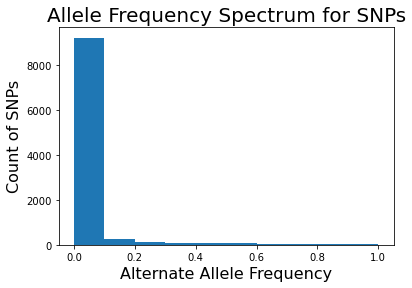

In [4]:
#plot alternate allele requency as histogram
fig, ax = plt.subplots()
ax.hist( allele_freq )
ax.set_title('Allele Frequency Spectrum for SNPs', fontsize = 20)
ax.set_xlabel('Alternate Allele Frequency', fontsize = 16)
ax.set_ylabel('Count of SNPs', fontsize = 16)
plt.show()

# Exercise 3: Subset data to common variation

In [5]:
# get true false of common variation
row_of_interest = (allele_freq > 0.05) & (allele_freq < 0.95)
row_of_interest

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [6]:
# get subset of data frame
df_com_var = df_snp.loc[row_of_interest,]
df_com_var

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,1,2,0,0,0,1,1,1,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,2
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
9975,chr21,43359202,C,T,2,1,0,1,0,1,...,1,2,2,2,2,1,2,2,2,2


# Exercise 4: PCA of samples SNP genotypes

In [7]:
pca_inp = df_com_var.iloc[:, 4:].T #take out first 4 columns then trasnpose
pca_inp

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


In [8]:
#standardize the data
pca_inp_stan = StandardScaler().fit_transform(pca_inp)
pca_inp_stan

array([[-0.41383472, -0.26974091, -1.11938741, ..., -0.63868904,
         0.64271638, -0.36559627],
       [ 2.16428478,  1.1386604 ,  0.26048638, ...,  1.12828128,
        -1.04906186, -0.36559627],
       [ 2.16428478, -0.26974091,  1.64036017, ...,  1.12828128,
        -2.74084009, -0.36559627],
       ...,
       [-0.41383472, -0.26974091,  1.64036017, ..., -0.63868904,
         0.64271638, -0.36559627],
       [-0.41383472, -0.26974091, -1.11938741, ..., -0.63868904,
         0.64271638, -0.36559627],
       [-0.41383472, -1.67814222,  0.26048638, ..., -0.63868904,
         0.64271638, -0.36559627]])

In [9]:
# PCA setting commonents
pca = PCA(n_components = 10)
pca_out = pca.fit_transform(pca_inp_stan)

In [10]:
# Get Data_Frame of 10 principle components
pca_out_df = pd.DataFrame(data = pca_out, 
                             columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"])
pca_out_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.546617,-5.396751,-0.518194,-0.329525,1.056018,0.426959,-0.806453,-5.213460
1,-6.133884,-8.631829,2.557714,-3.895639,0.325708,-2.258294,1.961381,4.342893,2.226014,-0.461751
2,-6.238473,-7.971870,-0.745795,-4.013185,-0.921492,4.047010,-0.820337,-1.963004,-0.872997,1.044727
3,-5.051218,-7.008727,2.805523,-4.758857,4.386645,0.435117,-0.988328,-1.510602,-1.087619,0.563894
4,-6.634383,-8.543670,3.071633,-1.595868,-4.383434,0.674195,0.678523,-4.314283,-0.365268,2.232875
...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665854,3.298626,-0.200679,-0.935634,-3.146157,1.076612,1.611332,-0.354120
2544,-6.295888,-3.116492,-5.555647,3.334540,3.322289,3.497060,-1.329283,-3.068454,2.142385,-1.044796
2545,-4.096947,-2.827362,-4.180865,3.697405,1.532544,0.016386,-1.307049,0.565257,1.014294,4.173590
2546,-6.263462,-2.585080,-4.225644,3.887931,-3.945329,-1.837015,-0.770281,-1.048435,0.731335,2.683090


Text(0, 0.5, 'PC2')

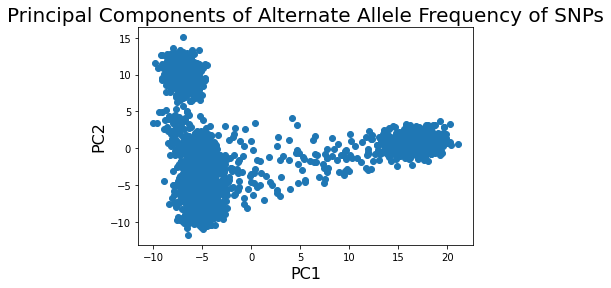

In [11]:
#plot principle component
fig, ax = plt.subplots()
ax.scatter(x = pca_out_df['PC1'], y = pca_out_df["PC2"])
ax.set_title('Principal Components of Alternate Allele Frequency of SNPs', fontsize=20)
ax.set_xlabel('PC1', fontsize=16)
ax.set_ylabel('PC2', fontsize=16)

# Advance Exercise 5: Load metadata

In [12]:
# load metadata for population, super population and gender
df_meta = pd.read_csv('/Users/cmdb/qbb2020-answers/day2-homework/integrated_call_samples_v3.20130502.ALL.panel', sep = '\t')
df_meta = df_meta.iloc[:,:4]
df_meta

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


# Advanced Exercise 6: Plot based on pop, superpop, sex

In [13]:
# add sample index
pca_out_df['sample'] = pca_inp.index
pca_out_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample
0,-6.144930,-9.818567,-1.546617,-5.396751,-0.518194,-0.329525,1.056018,0.426959,-0.806453,-5.213460,HG00096
1,-6.133884,-8.631829,2.557714,-3.895639,0.325708,-2.258294,1.961381,4.342893,2.226014,-0.461751,HG00097
2,-6.238473,-7.971870,-0.745795,-4.013185,-0.921492,4.047010,-0.820337,-1.963004,-0.872997,1.044727,HG00099
3,-5.051218,-7.008727,2.805523,-4.758857,4.386645,0.435117,-0.988328,-1.510602,-1.087619,0.563894,HG00100
4,-6.634383,-8.543670,3.071633,-1.595868,-4.383434,0.674195,0.678523,-4.314283,-0.365268,2.232875,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665854,3.298626,-0.200679,-0.935634,-3.146157,1.076612,1.611332,-0.354120,NA21137
2544,-6.295888,-3.116492,-5.555647,3.334540,3.322289,3.497060,-1.329283,-3.068454,2.142385,-1.044796,NA21141
2545,-4.096947,-2.827362,-4.180865,3.697405,1.532544,0.016386,-1.307049,0.565257,1.014294,4.173590,NA21142
2546,-6.263462,-2.585080,-4.225644,3.887931,-3.945329,-1.837015,-0.770281,-1.048435,0.731335,2.683090,NA21143


In [14]:
#merge metadata and PCA DF
pca_out_df = pd.merge(pca_out_df, df_meta, on = 'sample')
pca_out_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample,pop,super_pop,gender
0,-6.144930,-9.818567,-1.546617,-5.396751,-0.518194,-0.329525,1.056018,0.426959,-0.806453,-5.213460,HG00096,GBR,EUR,male
1,-6.133884,-8.631829,2.557714,-3.895639,0.325708,-2.258294,1.961381,4.342893,2.226014,-0.461751,HG00097,GBR,EUR,female
2,-6.238473,-7.971870,-0.745795,-4.013185,-0.921492,4.047010,-0.820337,-1.963004,-0.872997,1.044727,HG00099,GBR,EUR,female
3,-5.051218,-7.008727,2.805523,-4.758857,4.386645,0.435117,-0.988328,-1.510602,-1.087619,0.563894,HG00100,GBR,EUR,female
4,-6.634383,-8.543670,3.071633,-1.595868,-4.383434,0.674195,0.678523,-4.314283,-0.365268,2.232875,HG00101,GBR,EUR,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,-6.304582,-0.169819,-2.665854,3.298626,-0.200679,-0.935634,-3.146157,1.076612,1.611332,-0.354120,NA21137,GIH,SAS,female
2499,-6.295888,-3.116492,-5.555647,3.334540,3.322289,3.497060,-1.329283,-3.068454,2.142385,-1.044796,NA21141,GIH,SAS,female
2500,-4.096947,-2.827362,-4.180865,3.697405,1.532544,0.016386,-1.307049,0.565257,1.014294,4.173590,NA21142,GIH,SAS,female
2501,-6.263462,-2.585080,-4.225644,3.887931,-3.945329,-1.837015,-0.770281,-1.048435,0.731335,2.683090,NA21143,GIH,SAS,female


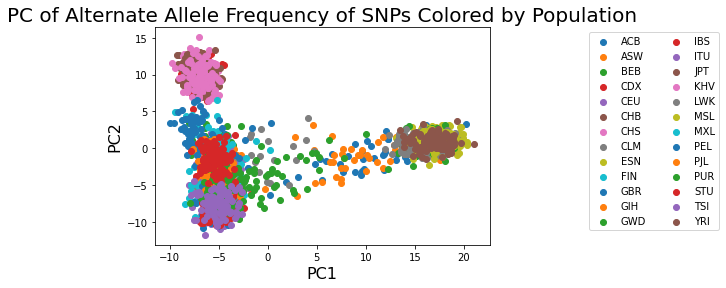

In [15]:
#Plot PCA colored based on population
fig, ax = plt.subplots()
pop = pca_out_df.groupby("pop")
for name, group in pop:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
ax.set_title('PC of Alternate Allele Frequency of SNPs Colored by Population', fontsize=20)
ax.set_xlabel('PC1', fontsize=16)
ax.set_ylabel('PC2', fontsize=16)
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)

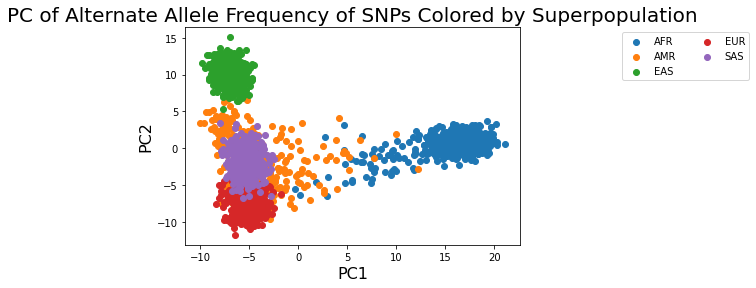

In [16]:
#plot PCA colored based on superpopulation
fig, ax = plt.subplots()
superpop = pca_out_df.groupby("super_pop")
for name, group in superpop:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
ax.set_title('PC of Alternate Allele Frequency of SNPs Colored by Superpopulation', fontsize=20)
ax.set_xlabel('PC1', fontsize=16)
ax.set_ylabel('PC2', fontsize=16)
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)

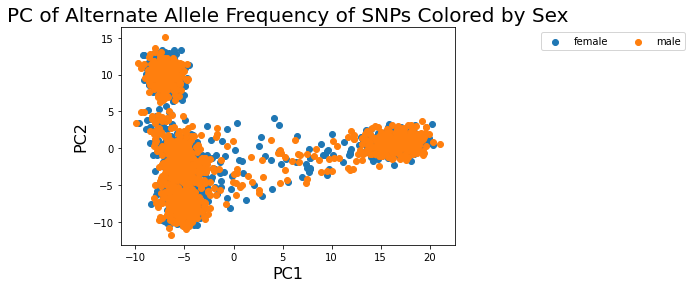

In [17]:
#color PCA colored based on gender
fig, ax = plt.subplots()
gender = pca_out_df.groupby("gender")
for name, group in gender:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
ax.set_title('PC of Alternate Allele Frequency of SNPs Colored by Sex', fontsize=20)
ax.set_xlabel('PC1', fontsize=16)
ax.set_ylabel('PC2', fontsize=16)
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)

# Advanced Exercise 7: 3D Plot

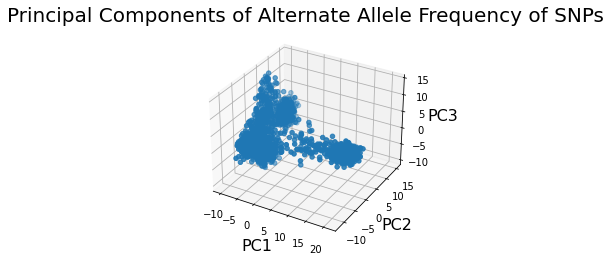

In [23]:
#plot 3D plot of 1st 3 PC
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_out_df['PC1'], pca_out_df['PC2'], pca_out_df['PC3'])
ax.set_xlabel('PC1', fontsize=16)
ax.set_ylabel('PC2', fontsize=16)
ax.set_zlabel('PC3', fontsize=16)
ax.set_title('Principal Components of Alternate Allele Frequency of SNPs', fontsize = 20)
plt.show()

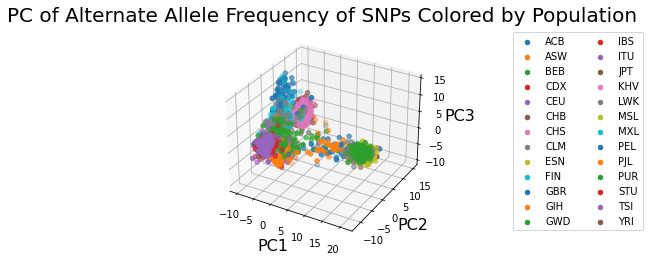

In [30]:
#plot 3D plot of 1st 3 PC colored based on population
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pop = pca_out_df.groupby("pop")
for name, group in pop:
    ax.scatter(group['PC1'],group['PC2'], group['PC3'], label = name)
ax.set_title('PC of Alternate Allele Frequency of SNPs Colored by Population', fontsize=20)
ax.set_xlabel('PC1', fontsize=16)
ax.set_ylabel('PC2', fontsize=16)
ax.set_zlabel('PC3', fontsize=16)
plt.legend(bbox_to_anchor = (2, 1), loc = 'upper right', ncol = 2)